<a href="https://colab.research.google.com/github/nghoanglong/NLP-Learning/blob/master/module_evaluate/Model%20Evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
%matplotlib inline

In [4]:
def visualize_evaluation(matrix, index_names=None, column_names=None, x_label=None, y_label=None, title=None):
    _, axes = plt.subplots(1, 2, figsize = (12, 5))
    sn.set(font_scale = 0.8)

    for idx in range(len(matrix)):
        df_matrix = pd.DataFrame(matrix[idx], index=index_names[idx], columns=column_names[idx])
        sn.heatmap(df_matrix, annot=True, ax=axes[idx])
        axes[idx].set_title(title[idx])
        axes[idx].set_xlabel(x_label[idx])
        axes[idx].set_ylabel(y_label[idx])
    plt.tight_layout()
    plt.show()

def model_evaluate(model, test_data):
    """Return tuple(accuracy, ndarray([precision, recall, F1-Score], [precision, recall, F1-Score],...)
    
    Compute Accuracy, Precision - Recall, F1-Score for multi-class classification sử dụng confusion matrix

    Default model: f(data) = label

    Default test_data = numpy array([(data, label), (data, label),...])
    
    Visualize confusion matrix and model evaluation using matplotlib, seaborn
    """

    # prepare data and label
    labels = np.array([
        (model(data), true_label) for data, true_label in test_data
    ])
    pred_label = labels[:, 0]
    true_label = labels[:, 1]
    class_names = np.unique(true_label)
    num_classes = class_names.shape[0]
    num_samples = true_label.shape[0]
    
    # confusion matrix
    cfs_matrix = np.zeros((num_classes, num_classes))
    for idx in range(num_samples):
        cfs_matrix[true_label[idx], pred_label[idx]] += 1
    
    try:
        # compare with confusion matrix when using sklearn libary
        from sklearn.metrics import confusion_matrix
        cfs_matrix_sklearn = confusion_matrix(true_label, pred_label)

        if cfs_matrix.all() != cfs_matrix_sklearn.all():
            raise Exception
    except Exception:
        print('Something is wrong with confusion matrix')
        return (None, None)
    else:
        # calculate accuracy
        accuracy = float(np.diagonal(cfs_matrix).sum()) / cfs_matrix.sum()
        
        # precision - recall, F1-score evaluate
        evaluations_name = np.array([
            'Precision', 'Recall', 'F1-Score'
        ])
        num_evaluations = evaluations_name.shape[0]
        result_evaluate = np.empty((num_evaluations, num_classes))

        for field in class_names:
            # trường hợp mẫu = 0 -> set mẫu về = 1 để có thể thực hiện phép chia
            precision = float(cfs_matrix[field, field]) / (1 if cfs_matrix[:, field].sum() == 0 else cfs_matrix[:, field].sum())
            recall = float(cfs_matrix[field, field]) / (1 if cfs_matrix[field, :].sum() == 0 else cfs_matrix[field, :].sum())
            f1_score = 2*(float(precision * recall) / (1 if precision + recall == 0 else (precision + recall)))
            result_evaluate[:, field] = np.array([precision, recall, f1_score])

        # prepare and visuzalize confusion matrix and model valuation
        matrix_init = np.concatenate(
            (np.array([cfs_matrix]), np.array([result_evaluate]))
        )
        index_names_init = np.concatenate(
            (np.array([class_names]), np.array([evaluations_name]))
        )
        column_names_init = np.concatenate(
            (np.array([class_names]), np.array([class_names]))
        )
        xlabel_init = np.concatenate(
            (['Predicted Label'], [None])
        )
        ylabel_init = np.concatenate(
            (['True Label'], [None])
        )
        title_init = np.concatenate(
            (['Unnormalized Confusion Matrix'], ['Model Evaluation'])
        )

        visualize_evaluation(matrix_init, index_names_init, column_names_init, xlabel_init, ylabel_init, title_init)

        return (accuracy, result_evaluate.T)
    finally:
        print('Done evaluate')

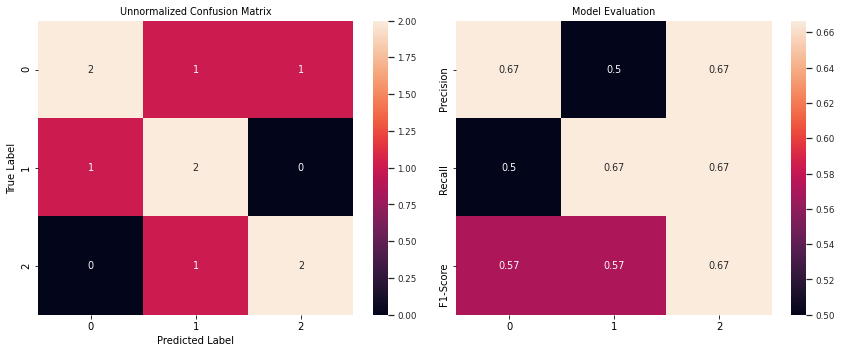

Done evaluate


In [5]:
# demo trên test data
true_label_test = np.array([
    0, 0, 0, 0, 1, 1, 1, 2, 2, 2
])
pred_label_test = np.array([
    0, 1, 0, 2, 1, 1, 0, 2, 1, 2
])

# tạo test_data là mảng các tuple [(data, label), (data, label),...]
test_data = np.array([
    (pred_label, true_label) for pred_label, true_label in zip(pred_label_test, true_label_test)
])

accuracy, result_predict = model_evaluate(lambda data: data, test_data)